In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             mean_squared_error, r2_score)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/air_quality.csv')

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Decide the target column
target_column = 'quality_level' if 'quality_level' in df.columns else 'AQI'

In [9]:
 Classification or Regression?
is_classification = df[target_column].dtype == 'object'

Object `Regression` not found.


In [10]:
# Split data
X = df.drop(columns=[target_column])
y = df[target_column]

In [11]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

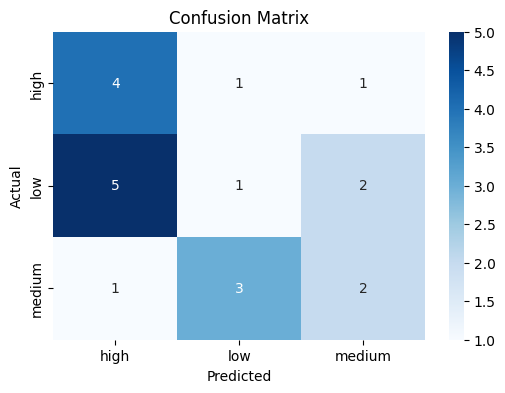


--- Classification Report ---

              precision    recall  f1-score   support

        high       0.40      0.67      0.50         6
         low       0.20      0.12      0.15         8
      medium       0.40      0.33      0.36         6

    accuracy                           0.35        20
   macro avg       0.33      0.38      0.34        20
weighted avg       0.32      0.35      0.32        20

Accuracy: 0.35
Precision: 0.3333333333333333
Recall: 0.375


In [24]:
# Perform classification
if is_classification:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Evaluation metrics
    print("\n--- Classification Report ---\n")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))

else:
    # Regression
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) # This line and all the lines below it in this 'else' block
    print("R-squared Score:", r2_score(y_test, y_pred))            # should be indented by one level (4 spaces)
                                                                    # to indicate that it is part of the 'else' block

    # Clustering on input features
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_scaled)

    # Plot clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=clusters, palette='Set2')
    plt.title('KMeans Clustering on Air Quality Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()